<a href="https://colab.research.google.com/github/MK316/statistics/blob/main/01_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CHAPTER 1 Exploratory Data Analysis**

[1] Estimates of location: dataframe, mean, median, etc.  
[2] Estimates of variability: range, percentile   
[3] Exploring the data distribution: boxplot, histogram, density plot  
[4] Exploring Binary nand Categorical Data  


# [1] Estimates of location

Example: Location of estimates of population and murder rates (in units of murders per 1000,000 people per year) for each US state (2010 census)

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from scipy.stats import trim_mean

💾  [crime data](https://corgis-edu.github.io/corgis/csv/state_crime/) to download (if needed)

In [5]:
url = 'https://raw.github.com/MK316/statistics/main/PSDS/state_crime.csv'
df1 = pd.read_csv(url)

state = df1
state.head()
# Dataset is now stored in a Pandas Dataframe

,State,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,...,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
0,Alabama,1960,3266740,1035.4,355.9,592.1,87.3,186.6,138.1,12.4,...,27.5,33823,11626,19344,2853,6097,4512,406,281,898
1,Alabama,1961,3302000,985.5,339.3,569.4,76.8,168.5,128.9,12.9,...,19.1,32541,11205,18801,2535,5564,4255,427,252,630
2,Alabama,1962,3358000,1067.0,349.1,634.5,83.4,157.3,119.0,9.4,...,22.5,35829,11722,21306,2801,5283,3995,316,218,754
3,Alabama,1963,3347000,1150.9,376.9,683.4,90.6,182.7,142.1,10.2,...,24.7,38521,12614,22874,3033,6115,4755,340,192,828
4,Alabama,1964,3407000,1358.7,466.6,784.1,108.0,213.1,163.0,9.3,...,29.1,46290,15898,26713,3679,7260,5555,316,397,992


### Individually accessing to Mean, Median, etc.

In [6]:
print(state['Data.Population'].mean())
print(state['Data.Population'].median())

9708501.690208668
3358000.0


### Data Summary using _df.describe()_

In [7]:
state.describe()

,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,Data.Rates.Violent.Rape,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
count,3115.000000,3.115000e+03,3115.000000,3115.000000,3115.000000,3115.000000,3115.000000,3115.000000,3115.000000,3115.000000,3115.000000,3.115000e+03,3.115000e+03,3.115000e+03,3.115000e+03,3.115000e+03,3.115000e+03,3115.000000,3115.000000,3115.000000
mean,1989.544141,9.708502e+06,3422.746388,980.836212,2255.336950,427.062504,397.877047,230.235441,6.477207,30.179872,120.786356,3.414501e+05,1.024037e+05,2.196652e+05,4.858270e+04,4.594917e+04,2.580668e+04,663.911717,3034.240449,15175.717817
std,17.299570,3.506750e+07,1575.438156,595.277457,970.917867,412.164938,287.498896,161.647444,5.886449,16.694626,143.516777,1.299392e+06,4.219078e+05,8.294311e+05,2.339655e+05,1.759960e+05,1.013202e+05,2437.666178,11714.612850,59589.454393
min,1960.000000,2.261670e+05,66.900000,126.300000,223.700000,31.100000,9.500000,3.600000,0.200000,0.800000,1.900000,4.320000e+02,7.510000e+02,1.489000e+03,1.940000e+02,3.700000e+01,1.400000e+01,1.000000,6.000000,8.000000
25%,1975.000000,1.279156e+06,2357.650000,561.800000,1575.450000,195.450000,217.200000,112.550000,3.100000,18.500000,37.300000,3.439550e+04,1.017150e+04,2.488000e+04,3.514000e+03,3.318000e+03,1.926000e+03,48.000000,328.000000,788.000000
50%,1990.000000,3.358000e+06,3420.200000,854.300000,2251.300000,315.400000,342.200000,195.800000,5.400000,28.800000,90.400000,1.015400e+05,2.871800e+04,6.743300e+04,1.033900e+04,1.154800e+04,6.378000e+03,186.000000,931.000000,3011.000000
75%,2005.000000,6.082836e+06,4433.900000,1218.200000,2876.900000,481.800000,518.250000,315.450000,8.400000,39.800000,152.200000,2.177235e+05,5.957700e+04,1.427570e+05,2.529950e+04,2.880400e+04,1.694900e+04,464.000000,1930.000000,7840.500000
max,2019.000000,3.282395e+08,9512.100000,5182.500000,5833.800000,4082.300000,2921.800000,1557.600000,80.600000,161.600000,1635.100000,1.296112e+07,8.632512e+06,8.142228e+06,6.004453e+06,1.932274e+06,1.135607e+06,24703.000000,139815.000000,687732.000000


In [29]:
summary = state.describe()
summary.iloc[:,0]

count    3115.000000
mean     1989.544141
std        17.299570
min      1960.000000
25%      1975.000000
50%      1990.000000
75%      2005.000000
max      2019.000000
Name: Year, dtype: float64

# [2] Estimates of variability

In [30]:
import statsmodels

**Interquartile (IQR):** The difference bw the 75th percentile and the 25th percentile.

In [31]:
state['Data.Population'].quantile(0.75) - state['Data.Population'].quantile(0.25) 

4803680.5

In [32]:
state['Data.Totals.Violent.Murder'].quantile([0.05,0.25,0.5,0.75,0.95])

0.05      13.0
0.25      48.0
0.50     186.0
0.75     464.0
0.95    1519.9
Name: Data.Totals.Violent.Murder, dtype: float64

# [3] Exploring the data distribution
**Keywords:** Boxplot, frequency table, histogram, density plot

data: murder rate by state (summarized version per 100,000 residents)

In [35]:
url = 'https://raw.githubusercontent.com/MK316/statistics/main/PSDS/murder_rate_by_state.csv'
df2 = pd.read_csv(url)
mr = df2
mr.head()

,YEAR,STATE,RATE,DEATHS,URL
0,2020,AL,14.2,654,/nchs/pressroom/states/alabama/al.htm
1,2020,AK,7.3,55,/nchs/pressroom/states/alaska/ak.htm
2,2020,AZ,7.5,525,/nchs/pressroom/states/arizona/az.htm
3,2020,AR,13.0,371,/nchs/pressroom/states/arkansas/ar.htm
4,2020,CA,6.1,2368,/nchs/pressroom/states/california/ca.htm


**Boxplot**

Text(0, 0.5, 'Murder rate (per billion)')

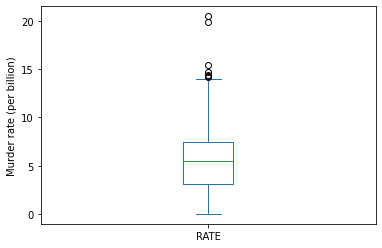

In [40]:
ax = (mr['RATE']).plot.box()
ax.set_ylabel('Murder rate (per billion)')

**Frequency Tables and Histograms**

Text(0.5, 0, 'Murder rate (per billions)')

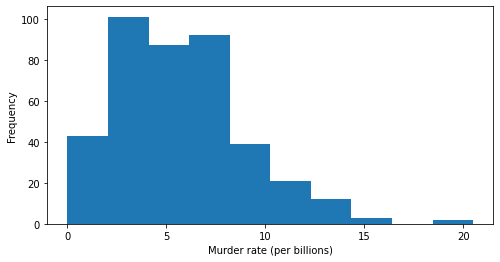

In [50]:
ax = mr['RATE'].plot.hist(figsize=(8,4))
ax.set_xlabel('Murder rate (per billions)')

**Density plot**

Text(0.5, 0, 'Murder Rate (per 1000,000)')

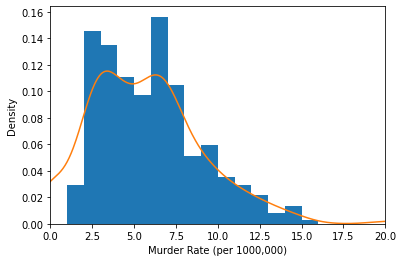

In [56]:
ax = mr['RATE'].plot.hist(density=True, xlim=[0,20],bins=range(1,20))
mr['RATE'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 1000,000)')

## [4] Exploring Binary and Categorical Data

* Mode, Expected value, Bar charts, Pie charts  

data: Delayed flights by the cause of delay at Dallas/Fort Worth Airport since 2010

In [62]:
url = 'https://raw.githubusercontent.com/MK316/practical-statistics-for-data-scientists/master/data/dfw_airline.csv'
df3 = pd.read_csv(url)

df3.head()

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


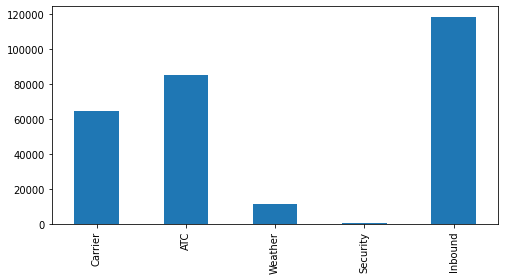

In [66]:
ax = df3.transpose().plot.bar(figsize=(8,4),legend=False)


In [112]:
data = {'Purchase': [21, 32, 11, 43]}
d4 = pd.DataFrame(data, index = d4['Product'])
d4

,Purchase
Product,
Laptop,21
Desktop,32
Macbook,11
Ipad,43


Text(0.5, 0, 'Electronics')

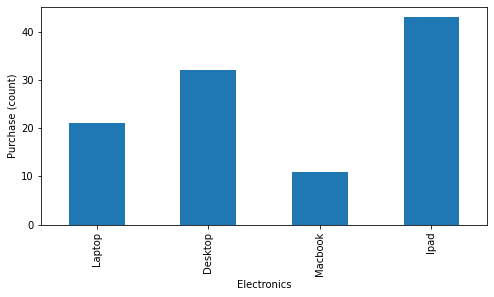

In [102]:
ax = d4['Purchase'].transpose().plot.bar(figsize = (8,4),legend = False)
ax.set_xticklabels(d4['Product'])
ax.set_ylabel('Purchase (count)')
ax.set_xlabel('Electronics')

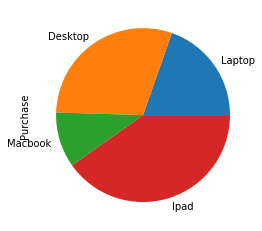

In [113]:
d4
ax = d4['Purchase'].transpose().plot.pie(figsize = (4,4))

## Correlation
Reference: https://www.kaggle.com/code/brunoarchetti/statistics-for-data-scientists-o-reilly-chapter1/notebook

(positively / negatively correlated)  
- correlation coefficient (-1 < r < 1): e.g., Pearson's r, Spearman's rho, and Kendall's tau correlation coefficients.    
- correlation matrix  
- scatterplot  

In [134]:
# !pip install seaborn.heatmap
import seaborn as sns

In [119]:
# from google.colab import files
# uploaded = files.upload()

Saving sp500_data.csv to sp500_data (1).csv


In [124]:
# from google.colab import files
# uploaded = files.upload()

Saving sp500_sectors.csv to sp500_sectors.csv


In [120]:
df5 = pd.read_csv('sp500_data.csv')

In [127]:
df6 = pd.read_csv('sp500_sectors.csv')

In [121]:
df5.head()

,Unnamed: 0,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
0,1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1,1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
2,1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
3,1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
4,1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


In [129]:
sp500_px = df5
sp500_sym = df6

In [131]:
sp500_sym.head()

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT
3,information_technology,Technology,systems_software,RHT
4,information_technology,Technology,it_consulting_&_services,CTSH


In [132]:
sp500_px = sp500_px.rename(columns={'Unnamed: 0': 'DATA'})

etfs = sp500_px.loc[sp500_px['DATA'] > "2012-07-01", 
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]

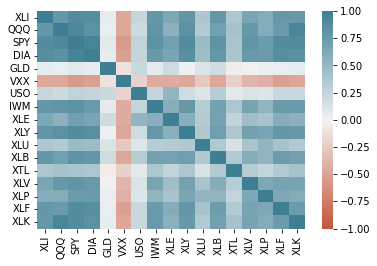

In [138]:
sns.heatmap(etfs.corr(), vmin=-1, vmax=1,
            cmap=sns.diverging_palette(20, 220, as_cmap=True))
plt.show()

In [139]:
etfs_2 = etfs.corr()
etfs_2.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,XLI,QQQ,SPY,DIA,GLD,VXX,USO,IWM,XLE,XLY,XLU,XLB,XTL,XLV,XLP,XLF,XLK
XLI,1.00,0.79,0.89,0.87,0.06,-0.47,0.24,0.78,0.65,0.80,0.38,0.78,0.37,0.66,0.60,0.79,0.78
QQQ,0.79,1.00,0.91,0.83,0.04,-0.47,0.20,0.81,0.56,0.84,0.35,0.71,0.42,0.78,0.61,0.75,0.95
SPY,0.89,0.91,1.00,0.95,0.08,-0.55,0.27,0.83,0.71,0.89,0.48,0.83,0.41,0.81,0.74,0.88,0.89
DIA,0.87,0.83,0.95,1.00,0.05,-0.51,0.26,0.76,0.66,0.85,0.46,0.79,0.38,0.77,0.75,0.86,0.84
GLD,0.06,0.04,0.08,0.05,1.00,-0.11,0.22,0.07,0.19,0.02,0.12,0.18,-0.04,-0.01,0.03,0.04,0.05
VXX,-0.47,-0.47,-0.55,-0.51,-0.11,1.00,-0.20,-0.45,-0.45,-0.47,-0.26,-0.47,-0.21,-0.38,-0.42,-0.51,-0.48
USO,0.24,0.20,0.27,0.26,0.22,-0.20,1.00,0.25,0.53,0.18,0.11,0.32,0.08,0.12,0.12,0.22,0.23
IWM,0.78,0.81,0.83,0.76,0.07,-0.45,0.25,1.00,0.59,0.78,0.33,0.70,0.39,0.66,0.54,0.76,0.76
XLE,0.65,0.56,0.71,0.66,0.19,-0.45,0.53,0.59,1.00,0.58,0.34,0.69,0.26,0.45,0.41,0.60,0.56
XLY,0.80,0.84,0.89,0.85,0.02,-0.47,0.18,0.78,0.58,1.00,0.37,0.72,0.37,0.70,0.66,0.78,0.77


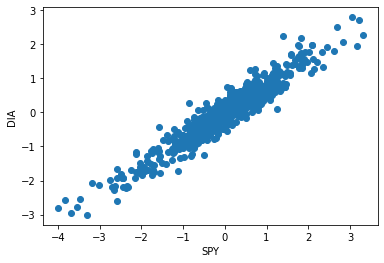

In [140]:
# positively correlated
plt.xlabel('SPY')
plt.ylabel('DIA')
plt.scatter(etfs['SPY'], etfs['DIA'])
plt.show()

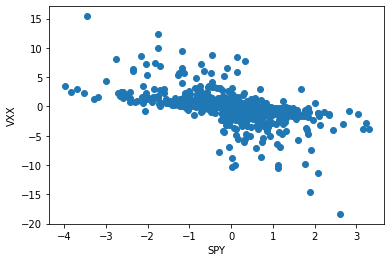

In [141]:
# negatively correlated
plt.xlabel('SPY')
plt.ylabel('VXX')
plt.scatter(etfs['SPY'], etfs['VXX'])
plt.show()

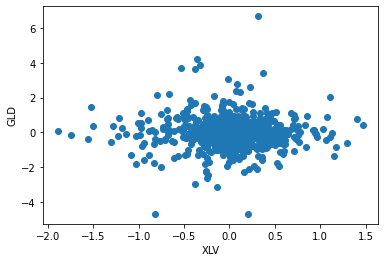

In [142]:
# no correlation
plt.xlabel('XLV')
plt.ylabel('GLD')
plt.scatter(etfs['XLV'], etfs['GLD'])
plt.show()

In [143]:
lc_loans = pd.read_csv('https://raw.githubusercontent.com/MK316/statistics/main/lc_loans.csv')
lc_loans.head()

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B


In [144]:
x_tab = pd.crosstab(lc_loans.grade, lc_loans.status)
x_tab['Total'] = pd.crosstab(lc_loans.grade, lc_loans.status).apply(lambda r: r.sum(), axis=1)
x_tab

status,Charged Off,Current,Fully Paid,Late,Total
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241


In [146]:
airlines = pd.read_csv('https://raw.githubusercontent.com/MK316/statistics/main/airline_stats.csv')
airlines.sample(5)

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
5860,4.340946,8.252855,0.425775,United
11339,4.457335,8.029192,0.826347,American
32602,6.903226,2.215054,0.000000,Jet Blue
28369,4.397959,6.612245,1.418367,American
25709,13.622590,3.870523,0.231405,Southwest


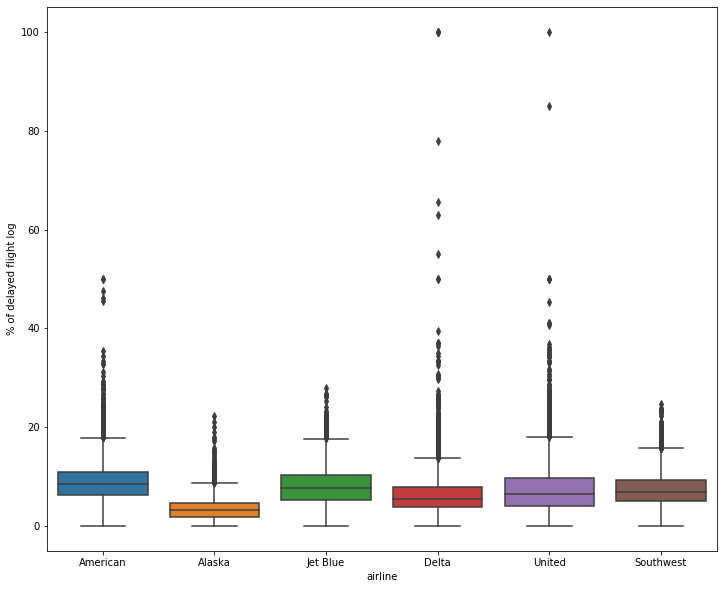

In [148]:
plt.figure(figsize=(12,10))
sns.boxplot(x = airlines.airline, y = airlines.pct_carrier_delay)
plt.ylabel("% of delayed flight log")
plt.show()

In [3]:
kc_tax = pd.read_csv('https://raw.githubusercontent.com/MK316/statistics/main/kc_tax.csv')
kc_tax.sample(5)

,TaxAssessedValue,SqFtTotLiving,ZipCode
16430,215000.0,1130,98168.0
238928,361000.0,2240,98155.0
388910,281000.0,1140,98144.0
133243,418000.0,1670,98052.0
73041,562000.0,2570,98075.0


In [4]:
# Removing very expensive and very small or large residences
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & 
                     (kc_tax.SqFtTotLiving > 100) & 
                     (kc_tax.SqFtTotLiving < 3500), :]
kc_tax0.shape

(432693, 3)

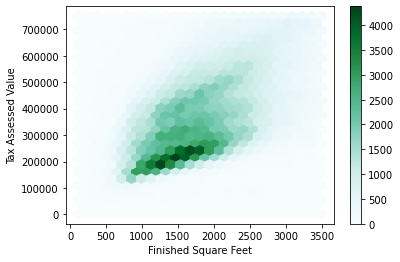

<Figure size 1584x720 with 0 Axes>

In [151]:
kc_tax0.plot(kind='hexbin', x='SqFtTotLiving', y='TaxAssessedValue', sharex=False, gridsize=25)
plt.xlabel('Finished Square Feet')
plt.ylabel('Tax Assessed Value')
plt.figure(figsize=(22,10))
plt.show()

In [5]:
kc_tax_zip1 = kc_tax0.loc[(kc_tax0.ZipCode == 98188), :]
kc_tax_zip2 = kc_tax0.loc[(kc_tax0.ZipCode == 98105), :]
kc_tax_zip3 = kc_tax0.loc[(kc_tax0.ZipCode == 98108), :]
kc_tax_zip4 = kc_tax0.loc[(kc_tax0.ZipCode == 98126), :]

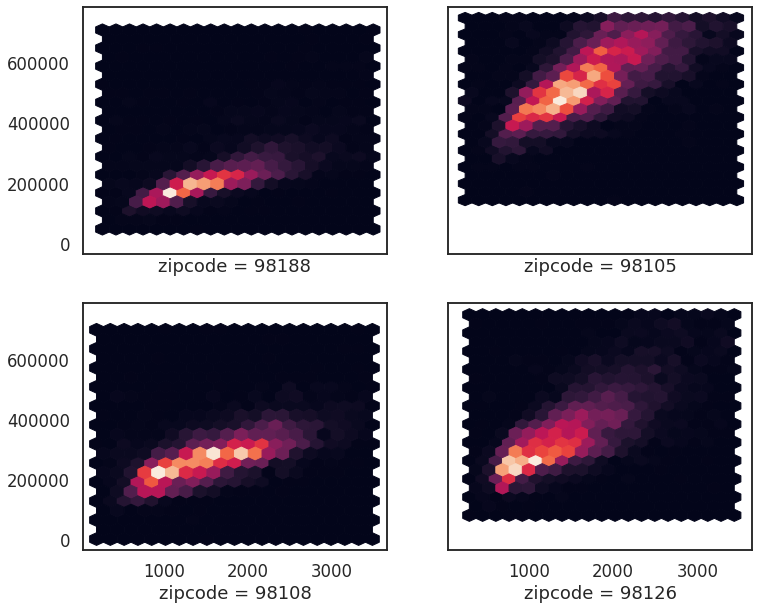

In [6]:
sns.set_style('white')
sns.set_palette('dark')
sns.set_context('talk')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12, 10))
ax1.hexbin(kc_tax_zip1.SqFtTotLiving, kc_tax_zip1.TaxAssessedValue, gridsize=20)
ax1.set_xlabel('zipcode = 98188')

ax2.hexbin(kc_tax_zip2.SqFtTotLiving, kc_tax_zip2.TaxAssessedValue, gridsize=20)
ax2.set_xlabel('zipcode = 98105')

ax3.hexbin(kc_tax_zip3.SqFtTotLiving, kc_tax_zip3.TaxAssessedValue, gridsize=20)
ax3.set_xlabel('zipcode = 98108')

ax4.hexbin(kc_tax_zip4.SqFtTotLiving, kc_tax_zip4.TaxAssessedValue, gridsize=20)
ax4.set_xlabel('zipcode = 98126')

plt.show()

(0.0, 600000.0)

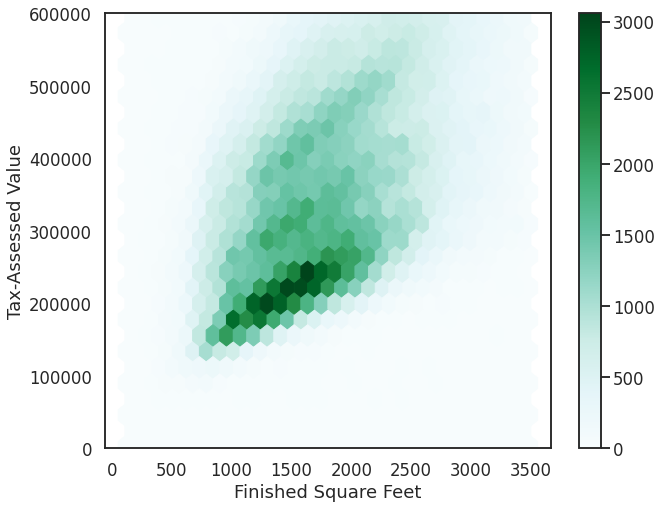

In [7]:
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving',y='TaxAssessedValue', gridsize=30, sharex=False, figsize=(10,8))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax-Assessed Value')
ax.set_ylim(0,600000)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from seaborn import kdeplot

In [ ]:
# ax = sns.kdeplot(kc_tax0.SqFtTotLiving, kc_tax0.TaxAssessedValue,ax=ax)
# ax.set_xlabel('Finished Square Feet')
# ax.set_ylabel('Tax-Assessed Value')

### Two Categorical Variables